## beginning, Team6

In [ ]:
## 1. import libraries

In [1]:
%matplotlib inline
import matplotlib
import os              # This provides several system utilities
import pandas as pd    # This is the workhorse of data munging in Python
import numpy as np     # This is for general numerical operations 
import seaborn as sns  # This allows us to efficiently and beautifully plot
import networkx as nx  
import osmnx as ox
import statsmodels.api as sm
import matplotlib.pyplot as plt

# display settings (optional)
pd.set_option('display.max_columns', 50)
pd.set_option('display.width', 120)

## 2. Load data

## 2.1 Parking pressure file and basic cleaning

In [2]:
#for the import process, next step is to create a string variable containing the directory of the file and a file name variable
infodir = r'C:\Users\EPRO\OneDrive - Wageningen University & Research\Course Channel Metropolitan Challenges 2025 - Paper Group 6 Parking space vs Food Space'
fname = infodir + r'\data\buurten_filtered.csv'

gpdf01 = pd.read_csv(fname)
#this is to verify
gpdf01.head()

,OBJECTNUMMER,BRT,SDC,Periode,Dagdeel,Cap_open,Bez_open,Fout,Object,Bez_tot,Netto_PKD,Bruto_PKD,WKT_LNG_LAT,WKT_LAT_LNG,LNG,LAT
0,117.0,AA01 Planciusbuurt-Noord,A,202403-202404,doordeweeks avond,55.0,52.0,3.0,0.0,55.0,95.0,100.0,"POLYGON((4.8857454 52.3881665,4.8844789 52.388...","POLYGON((52.3881665 4.8857454,52.3883785 4.884...",4.884390,52.387023
1,118.0,AA02 Westelijke eilanden,A,202403-202404,doordeweeks avond,313.0,287.0,9.0,0.0,296.0,92.0,95.0,"POLYGON((4.8910092 52.3884398,4.8859714 52.388...","POLYGON((52.3884398 4.8910092,52.3881287 4.885...",4.887548,52.385401
2,119.0,AA03 Westerdokseiland,A,202403-202404,doordeweeks avond,165.0,76.0,0.0,0.0,76.0,46.0,46.0,"POLYGON((4.8950776 52.3886909,4.8923612 52.388...","POLYGON((52.3886909 4.8950776,52.3885233 4.892...",4.894474,52.384417
3,120.0,AA04 Planciusbuurt-Zuid,A,202403-202404,doordeweeks avond,20.0,15.0,1.0,0.0,16.0,75.0,80.0,"POLYGON((4.8839232 52.385505,4.884072 52.38566...","POLYGON((52.385505 4.8839232,52.3856666 4.8840...",4.882867,52.384947
4,121.0,AA05 Haarlemmerbuurt-West,A,202403-202404,doordeweeks avond,148.0,141.0,4.0,0.0,145.0,95.0,98.0,"POLYGON((4.8839232 52.385505,4.8835118 52.3849...","POLYGON((52.385505 4.8839232,52.3849538 4.8835...",4.886377,52.383013


In [3]:
#Team6 is dropping all entries that do not have "doordeweeks avond" in "Dagdeel"
#Team6 chose to focus on the most likely time cars will be at home after a day at work
gpdf01_1 = gpdf01[gpdf01['Dagdeel'] == 'doordeweeks avond']
#Team6 is creating column Wijken, to merge more easily with future databases for maps
gpdf01_1['Wijken'] = gpdf01_1['BRT'].str[:2]
#team6 is creating a column with the buurt code to keep it
gpdf01_1['BRT_code'] = gpdf01_1['BRT'].astype(str).str[:4]
#team6 is separating the name of each neighborhood to merge more easily with future databases
gpdf01_1['BRT_name'] = gpdf01_1['BRT'].str[5:]
#team6 is replacing all dashes in the name of each neighborhood to merge more easily with future databases
gpdf01_1['BRT_name'] = gpdf01_1['BRT_name'].str.replace('-', ' ', regex=False)
gpdf01_1.head(10)

C:\Users\EPRO\AppData\Local\Temp\ipykernel_34056\2552515082.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gpdf01_1['Wijken'] = gpdf01_1['BRT'].str[:2]
C:\Users\EPRO\AppData\Local\Temp\ipykernel_34056\2552515082.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gpdf01_1['BRT_code'] = gpdf01_1['BRT'].astype(str).str[:4]
C:\Users\EPRO\AppData\Local\Temp\ipykernel_34056\2552515082.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer

,OBJECTNUMMER,BRT,SDC,Periode,Dagdeel,Cap_open,Bez_open,Fout,Object,Bez_tot,Netto_PKD,Bruto_PKD,WKT_LNG_LAT,WKT_LAT_LNG,LNG,LAT,Wijken,BRT_code,BRT_name
0,117.0,AA01 Planciusbuurt-Noord,A,202403-202404,doordeweeks avond,55.0,52.0,3.0,0.0,55.0,95.0,100.0,"POLYGON((4.8857454 52.3881665,4.8844789 52.388...","POLYGON((52.3881665 4.8857454,52.3883785 4.884...",4.884390,52.387023,AA,AA01,Planciusbuurt Noord
1,118.0,AA02 Westelijke eilanden,A,202403-202404,doordeweeks avond,313.0,287.0,9.0,0.0,296.0,92.0,95.0,"POLYGON((4.8910092 52.3884398,4.8859714 52.388...","POLYGON((52.3884398 4.8910092,52.3881287 4.885...",4.887548,52.385401,AA,AA02,Westelijke eilanden
2,119.0,AA03 Westerdokseiland,A,202403-202404,doordeweeks avond,165.0,76.0,0.0,0.0,76.0,46.0,46.0,"POLYGON((4.8950776 52.3886909,4.8923612 52.388...","POLYGON((52.3886909 4.8950776,52.3885233 4.892...",4.894474,52.384417,AA,AA03,Westerdokseiland
3,120.0,AA04 Planciusbuurt-Zuid,A,202403-202404,doordeweeks avond,20.0,15.0,1.0,0.0,16.0,75.0,80.0,"POLYGON((4.8839232 52.385505,4.884072 52.38566...","POLYGON((52.385505 4.8839232,52.3856666 4.8840...",4.882867,52.384947,AA,AA04,Planciusbuurt Zuid
4,121.0,AA05 Haarlemmerbuurt-West,A,202403-202404,doordeweeks avond,148.0,141.0,4.0,0.0,145.0,95.0,98.0,"POLYGON((4.8839232 52.385505,4.8835118 52.3849...","POLYGON((52.385505 4.8839232,52.3849538 4.8835...",4.886377,52.383013,AA,AA05,Haarlemmerbuurt West
5,122.0,AA06 Haarlemmerbuurt-Oost,A,202403-202404,doordeweeks avond,121.0,110.0,1.0,0.0,111.0,91.0,92.0,"POLYGON((4.8901799 52.3823939,4.8901504 52.382...","POLYGON((52.3823939 4.8901799,52.3823625 4.890...",4.892116,52.380579,AA,AA06,Haarlemmerbuurt Oost
6,123.0,AB01 Marnixbuurt-Noord,A,202403-202404,doordeweeks avond,169.0,137.0,1.0,0.0,138.0,81.0,82.0,"POLYGON((4.8829591 52.3836506,4.8829307 52.383...","POLYGON((52.3836506 4.8829591,52.3837005 4.882...",4.880560,52.380942,AB,AB01,Marnixbuurt Noord
7,124.0,AB02 Driehoekbuurt,A,202403-202404,doordeweeks avond,312.0,266.0,3.0,0.0,269.0,85.0,86.0,"POLYGON((4.8829591 52.3836506,4.8803612 52.379...","POLYGON((52.3836506 4.8829591,52.37958 4.88036...",4.884213,52.381615,AB,AB02,Driehoekbuurt
8,125.0,AB03 Anjeliersbuurt-Noord,A,202403-202404,doordeweeks avond,165.0,141.0,0.0,0.0,141.0,85.0,85.0,"POLYGON((4.8871229 52.3790942,4.8881601 52.380...","POLYGON((52.3790942 4.8871229,52.3802151 4.888...",4.883804,52.379197,AB,AB03,Anjeliersbuurt Noord
9,126.0,AB04 Zaagpoortbuurt,A,202403-202404,doordeweeks avond,158.0,85.0,2.0,0.0,87.0,54.0,55.0,"POLYGON((4.8791773 52.3777046,4.8786863 52.377...","POLYGON((52.3777046 4.8791773,52.3778162 4.878...",4.877343,52.376228,AB,AB04,Zaagpoortbuurt


In [4]:
#team6 is checking how many we have left
before = len(gpdf01)
after = len(gpdf01_1)
print(f"Rows before: {before}, after: {after}, dropped: {before - after}")

Rows before: 1447, after: 518, dropped: 929


In [5]:
#team6 is purging all rows with "netto_pkd" and "bruto_pkd" higher than 150% because that looks like missing and damaged data
#that would otherwise interfere with our next process
gpdf01_2 = gpdf01_1[(gpdf01_1['Netto_PKD'] <= 150) & (gpdf01_1['Bruto_PKD'] <= 150)]
#we had prepared the db to be ordered in this point, but after getting the second database,
#it will be better to do that after the merger
## gpdf01_2 = gpdf01_2.sort_values(by=["Netto_PKD", "Bruto_PKD"], ascending=[False, True])
gpdf01_2.head(10)

,OBJECTNUMMER,BRT,SDC,Periode,Dagdeel,Cap_open,Bez_open,Fout,Object,Bez_tot,Netto_PKD,Bruto_PKD,WKT_LNG_LAT,WKT_LAT_LNG,LNG,LAT,Wijken,BRT_code,BRT_name
0,117.0,AA01 Planciusbuurt-Noord,A,202403-202404,doordeweeks avond,55.0,52.0,3.0,0.0,55.0,95.0,100.0,"POLYGON((4.8857454 52.3881665,4.8844789 52.388...","POLYGON((52.3881665 4.8857454,52.3883785 4.884...",4.884390,52.387023,AA,AA01,Planciusbuurt Noord
1,118.0,AA02 Westelijke eilanden,A,202403-202404,doordeweeks avond,313.0,287.0,9.0,0.0,296.0,92.0,95.0,"POLYGON((4.8910092 52.3884398,4.8859714 52.388...","POLYGON((52.3884398 4.8910092,52.3881287 4.885...",4.887548,52.385401,AA,AA02,Westelijke eilanden
2,119.0,AA03 Westerdokseiland,A,202403-202404,doordeweeks avond,165.0,76.0,0.0,0.0,76.0,46.0,46.0,"POLYGON((4.8950776 52.3886909,4.8923612 52.388...","POLYGON((52.3886909 4.8950776,52.3885233 4.892...",4.894474,52.384417,AA,AA03,Westerdokseiland
3,120.0,AA04 Planciusbuurt-Zuid,A,202403-202404,doordeweeks avond,20.0,15.0,1.0,0.0,16.0,75.0,80.0,"POLYGON((4.8839232 52.385505,4.884072 52.38566...","POLYGON((52.385505 4.8839232,52.3856666 4.8840...",4.882867,52.384947,AA,AA04,Planciusbuurt Zuid
4,121.0,AA05 Haarlemmerbuurt-West,A,202403-202404,doordeweeks avond,148.0,141.0,4.0,0.0,145.0,95.0,98.0,"POLYGON((4.8839232 52.385505,4.8835118 52.3849...","POLYGON((52.385505 4.8839232,52.3849538 4.8835...",4.886377,52.383013,AA,AA05,Haarlemmerbuurt West
5,122.0,AA06 Haarlemmerbuurt-Oost,A,202403-202404,doordeweeks avond,121.0,110.0,1.0,0.0,111.0,91.0,92.0,"POLYGON((4.8901799 52.3823939,4.8901504 52.382...","POLYGON((52.3823939 4.8901799,52.3823625 4.890...",4.892116,52.380579,AA,AA06,Haarlemmerbuurt Oost
6,123.0,AB01 Marnixbuurt-Noord,A,202403-202404,doordeweeks avond,169.0,137.0,1.0,0.0,138.0,81.0,82.0,"POLYGON((4.8829591 52.3836506,4.8829307 52.383...","POLYGON((52.3836506 4.8829591,52.3837005 4.882...",4.880560,52.380942,AB,AB01,Marnixbuurt Noord
7,124.0,AB02 Driehoekbuurt,A,202403-202404,doordeweeks avond,312.0,266.0,3.0,0.0,269.0,85.0,86.0,"POLYGON((4.8829591 52.3836506,4.8803612 52.379...","POLYGON((52.3836506 4.8829591,52.37958 4.88036...",4.884213,52.381615,AB,AB02,Driehoekbuurt
8,125.0,AB03 Anjeliersbuurt-Noord,A,202403-202404,doordeweeks avond,165.0,141.0,0.0,0.0,141.0,85.0,85.0,"POLYGON((4.8871229 52.3790942,4.8881601 52.380...","POLYGON((52.3790942 4.8871229,52.3802151 4.888...",4.883804,52.379197,AB,AB03,Anjeliersbuurt Noord
9,126.0,AB04 Zaagpoortbuurt,A,202403-202404,doordeweeks avond,158.0,85.0,2.0,0.0,87.0,54.0,55.0,"POLYGON((4.8791773 52.3777046,4.8786863 52.377...","POLYGON((52.3777046 4.8791773,52.3778162 4.878...",4.877343,52.376228,AB,AB04,Zaagpoortbuurt


In [6]:
#team6 dropping a few columns from the database to focus on the main usefull content
gpdf01_2 = gpdf01_2.drop(columns=['BRT', 'Dagdeel', 'WKT_LNG_LAT', 'WKT_LAT_LNG', 'LNG', 'LAT'])
#ordering the database columns to be easier to read
gpdf01_2 = gpdf01_2[['OBJECTNUMMER', 'Wijken', 'BRT_code', 'BRT_name'] + [col for col in gpdf01_2.columns if col not in ['OBJECTNUMMER', 'Wijken', 'BRT_code', 'BRT_name']]]
gpdf01_2.head()

,OBJECTNUMMER,Wijken,BRT_code,BRT_name,SDC,Periode,Cap_open,Bez_open,Fout,Object,Bez_tot,Netto_PKD,Bruto_PKD
0,117.0,AA,AA01,Planciusbuurt Noord,A,202403-202404,55.0,52.0,3.0,0.0,55.0,95.0,100.0
1,118.0,AA,AA02,Westelijke eilanden,A,202403-202404,313.0,287.0,9.0,0.0,296.0,92.0,95.0
2,119.0,AA,AA03,Westerdokseiland,A,202403-202404,165.0,76.0,0.0,0.0,76.0,46.0,46.0
3,120.0,AA,AA04,Planciusbuurt Zuid,A,202403-202404,20.0,15.0,1.0,0.0,16.0,75.0,80.0
4,121.0,AA,AA05,Haarlemmerbuurt West,A,202403-202404,148.0,141.0,4.0,0.0,145.0,95.0,98.0


In [7]:
#here is to have a visualization and quick review to make sure we don't have
#any outliers in our db at this moment
gpdf01_2d = gpdf01_2.sort_values(by=['Netto_PKD'], ascending=[False])
gpdf01_2d.head(10)

,OBJECTNUMMER,Wijken,BRT_code,BRT_name,SDC,Periode,Cap_open,Bez_open,Fout,Object,Bez_tot,Netto_PKD,Bruto_PKD
157,563.0,EG,EG02,GWL terrein,E,202409-202410,38.0,39.0,0.0,0.0,39.0,103.0,103.0
70,357.0,TA,TA03,Amstel III deel A/B Noord,T,202406,4.0,4.0,0.0,0.0,4.0,100.0,100.0
89,376.0,TF,TF02,Grunder/Koningshoef,T,202406,425.0,416.0,24.0,0.0,440.0,98.0,104.0
139,545.0,EB,EB08,Zeeheldenbuurt,E,202409-202410,212.0,205.0,7.0,0.0,212.0,97.0,100.0
171,577.0,EK,EK03,Jan Maijenbuurt,E,202409-202410,260.0,251.0,0.0,0.0,251.0,97.0,97.0
466,1542.0,KK,KK04,Scheldebuurt Oost,K,202502-202503,512.0,497.0,5.0,0.0,502.0,97.0,98.0
87,374.0,TE,TE03,G buurt Noord,T,202406,320.0,306.0,29.0,0.0,335.0,96.0,105.0
444,1520.0,KF,KF01,Cornelis Troostbuurt,K,202502-202503,607.0,580.0,1.0,0.0,581.0,96.0,96.0
143,549.0,EC,EC02,Houthavens Oost,E,202409-202410,49.0,47.0,0.0,0.0,47.0,96.0,96.0
281,1032.0,FB,FB07,Bakemabuurt,F,202409-202411,533.0,513.0,24.0,0.0,537.0,96.0,101.0


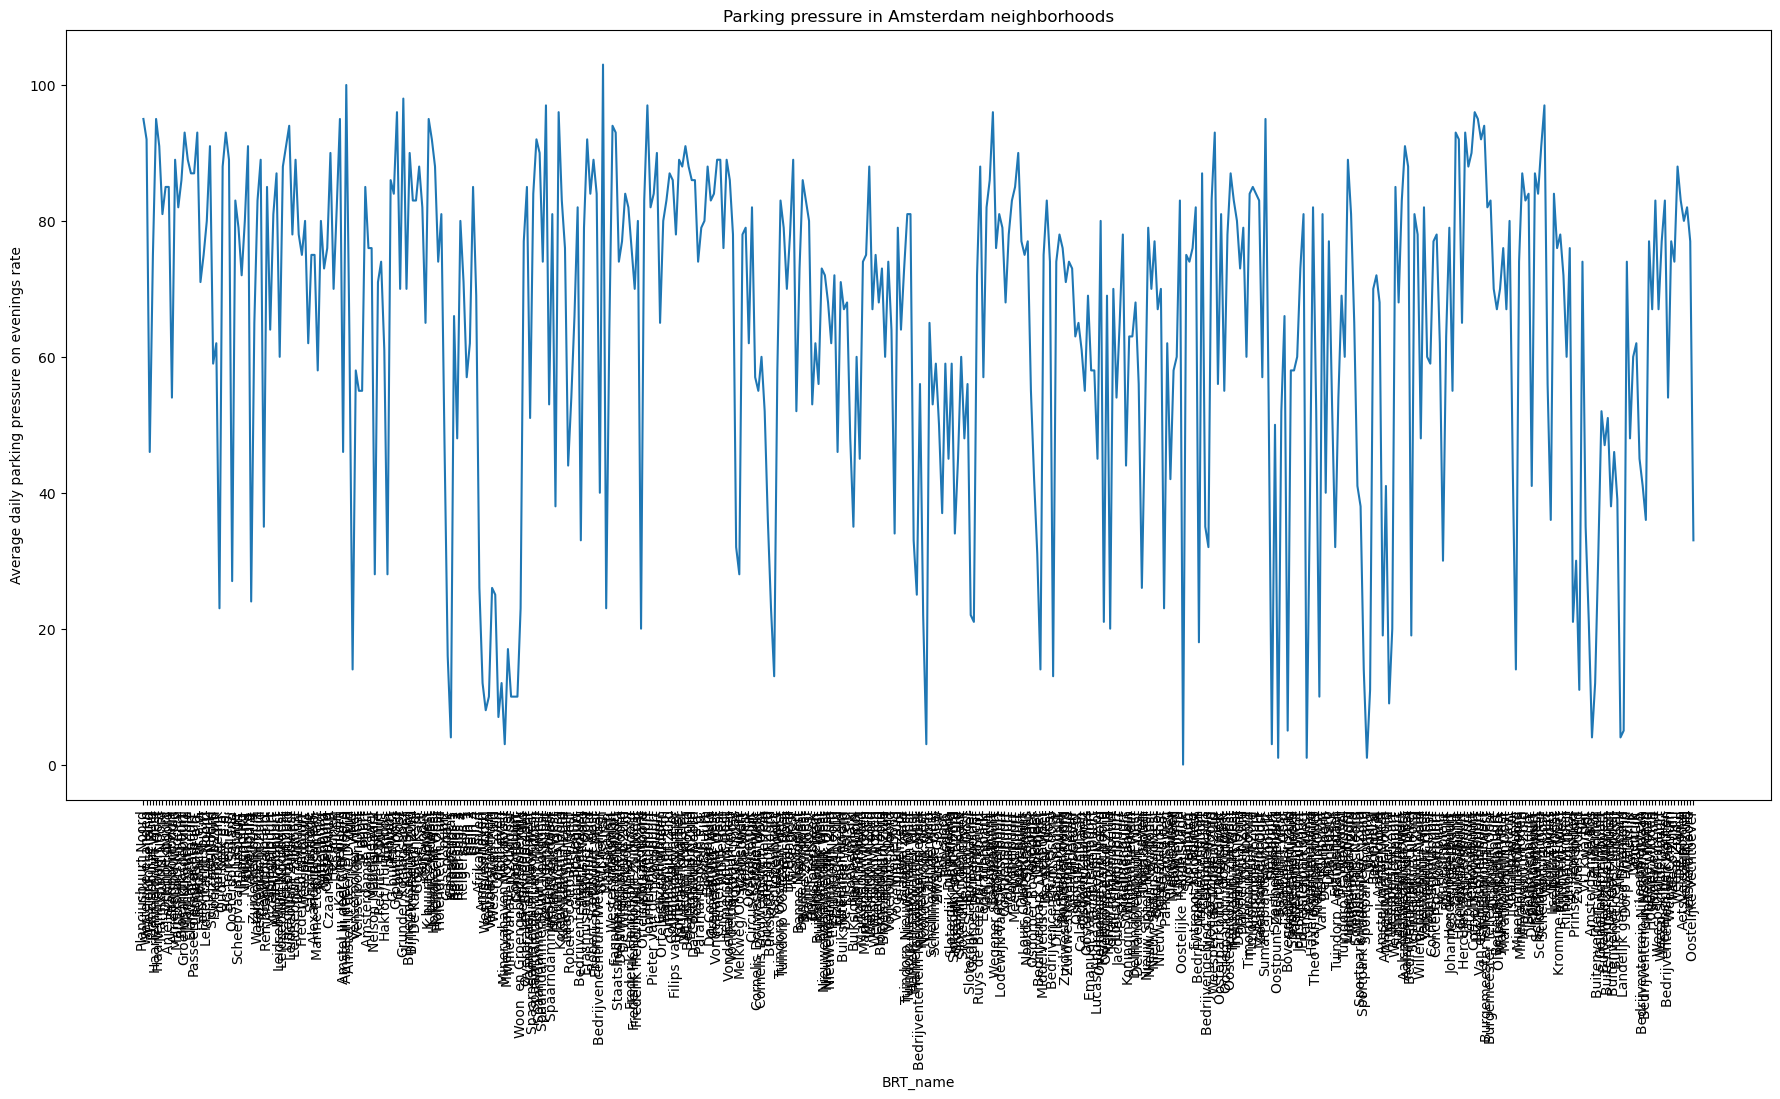

In [27]:
#graphical selection of neighborhood
plt.figure(figsize=(22,10))
plt.plot(gpdf01_2['BRT_name'], gpdf01_2['Netto_PKD'])
plt.xlabel('BRT_name')
plt.xticks(rotation=90)
plt.ylabel('Average daily parking pressure on evenings rate')
plt.title('Parking pressure in Amsterdam neighborhoods')
plt.show()

## 2.2 Green database and basic cleaning 

In [8]:
#for the import process, next step is to create a string variable containing the directory of the file and a file name variable
infodir2 = r'C:\Users\EPRO\OneDrive - Wageningen University & Research\Course Channel Metropolitan Challenges 2025 - Paper Group 6 Parking space vs Food Space'
fname2 = infodir2 + r'\data\KEA_db_green_and_gray_ngbhd_2023_03_trnsltd_only_AMS.csv'

gpdf02g = pd.read_csv(fname2)
#this is to verify
gpdf02g.head()

,OBJID,mnpty_code,mnpty_name,ngbhd_code,KVID,ngbhd_name,urbtn_indx_km2,pop_dnsty_km2,qty_inhbt,perc_built_area,perc_water_total,m2_water,m2_ngbhd,perc_built_envmt,m2_publc_space,perc_publc_space,perc_publcnt,m2_publc_green,perc_public_green,perc_publc_tree,perc_trnsn_total,perc_publcnt_tree,perc_publcnt_green,perc_publcnt_greennt,perc_other,...,m2_built_envmt,m2_built_envmt_greennt,m2_green_other,m2_other_surfc,m2_other_greennt,m2_tree_publc,m2_tree_publcnt,m2_tree_built_envmt,m2_tree_water,perc_green,perc_low_green,perc_tree,perc_built_gray,m2_agrct_green,m2_agrct,m2_agrct_greennt,m2_trnsn_greennt,m2_green_trnsn,m2_trnsn,m2_agrct_tree,m2_tree_other,m2_tree_trnsn,perc_trnsn_tree,perc_trnsn_green,perc_trnsn_greennt
0,7,GM0363,Amsterdam,BU03631306,4427,Westergasfabriek,1,-99999999,0,99.999999,12.47,26504.03,255419.18,7.28,99685.39,68.27,10.31,44776.51,17.53,29.24,1.67,1.06,0.43,8.82,0.0,...,18382.65,18382.65,0.0,4.67,4.67,74683.12,2719.53,199.06,5333.44,50.53,18.01,32.52,39.09,0.0,0.0,0.0,4022.37,130.2,4152.57,0.0,0.0,130.49,0.23,3.28,3.60
1,45,GM0363,Amsterdam,BU03634709,4552,Duivelseiland,1,23729,1385,100.000003,4.97,2920.45,61646.98,34.69,23080.23,42.51,17.82,202.57,0.33,5.07,0.00,5.94,0.69,11.19,0.0,...,20876.45,20876.45,0.0,0.00,0.00,3126.23,3662.17,514.10,141.05,13.09,1.02,12.07,82.16,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.00,0.46,4.27,8.62
2,53,GM0363,Amsterdam,BU03634600,4539,Valeriusbuurt Oost,1,12248,1405,99.999996,4.55,4607.40,120651.50,32.67,38367.50,40.32,22.34,2521.47,2.09,8.52,0.12,8.73,1.51,12.10,0.0,...,38507.74,38507.74,0.0,0.00,0.00,10281.06,10538.49,906.86,879.44,22.33,3.60,18.73,73.85,0.0,0.0,0.0,144.76,0.0,144.76,0.0,0.0,0.00,1.25,1.37,1.83
3,90,GM0363,Amsterdam,BU03635301,4579,IJselbuurt Oost,1,21880,2900,99.999988,16.80,26146.56,159417.36,25.28,54516.32,40.28,17.55,2078.39,1.30,6.09,0.10,5.97,2.77,8.81,0.0,...,39400.79,39378.99,0.0,0.00,0.00,9703.89,9513.20,901.93,631.04,17.14,4.09,13.05,66.47,0.0,0.0,0.0,109.68,8.4,118.08,0.0,0.0,32.23,0.03,0.68,9.48
4,92,GM0363,Amsterdam,BU03639303,4774,F-buurt,1,20169,4465,100.000004,6.38,14141.01,233166.41,24.11,121287.55,56.32,13.12,12907.19,5.54,4.30,0.06,0.43,0.42,12.27,0.0,...,56080.41,56080.41,0.0,0.00,0.00,10036.16,1006.84,141.33,735.41,11.07,5.96,5.11,82.86,0.0,0.0,0.0,145.69,0.0,145.69,0.0,0.0,0.00,0.00,0.01,16.96


In [24]:
#team6 slicing database to focus on the main usefull content
gpdf02g_1 = gpdf02g.drop(columns=['OBJID', 'ngbhd_code', 'perc_other', 'perc_publcnt', 'perc_trnsn_total', 'perc_publcnt_tree',
                                      'perc_publcnt_green', 'perc_publcnt_greennt', 'perc_built_tree', 'perc_built_green', 'perc_built_greennt',
                                      'perc_other_tree', 'perc_other_green', 'perc_other_greennt', 'perc_trnsn_tree', 'perc_trnsn_green',
                                      'perc_trnsn_greennt', 'perc_water', 'perc_water_tree', 'm2_ngbhd_pls_agrct', 'm2_publicnt_green',
                                      'm2_publicnt', 'm2_publcnt_greennt', 'm2_publicnt_green', 'm2_publicnt', 'm2_publcnt_greennt',
                                      'm2_built_envmt_green', 'm2_built_envmt', 'm2_built_envmt_greennt', 'm2_water', 'm2_agrct_green', 'm2_agrct',
                                      'm2_agrct_greennt', 'm2_green_other', 'm2_other_surfc', 'm2_other_greennt', 'm2_green_trnsn', 'm2_trnsn',
                                      'm2_trnsn_greennt', 'm2_tree_publc', 'm2_tree_publcnt', 'm2_tree_built_envmt', 'm2_tree_water', 'm2_agrct_tree',
                                      'm2_tree_other', 'm2_tree_trnsn', 'perc_built_gray', 'mnpty_code', 'mnpty_name', 'qty_inhbt'])
gpdf02g_1.head()

,KVID,ngbhd_name,urbtn_indx_km2,pop_dnsty_km2,perc_built_area,perc_water_total,m2_ngbhd,perc_built_envmt,m2_publc_space,perc_publc_space,m2_publc_green,perc_public_green,perc_publc_tree,perc_public_greennt,m2_publc_greennt,perc_green,perc_low_green,perc_tree
0,4427,Westergasfabriek,1,-99999999,99.999999,12.47,255419.18,7.28,99685.39,68.27,44776.51,17.53,29.24,21.50,54908.88,50.53,18.01,32.52
1,4552,Duivelseiland,1,23729,100.000003,4.97,61646.98,34.69,23080.23,42.51,202.57,0.33,5.07,37.11,22877.66,13.09,1.02,12.07
2,4539,Valeriusbuurt Oost,1,12248,99.999996,4.55,120651.50,32.67,38367.50,40.32,2521.47,2.09,8.52,29.71,35846.03,22.33,3.60,18.73
3,4579,IJselbuurt Oost,1,21880,99.999988,16.80,159417.36,25.28,54516.32,40.28,2078.39,1.30,6.09,32.89,52437.93,17.14,4.09,13.05
4,4774,F-buurt,1,20169,100.000004,6.38,233166.41,24.11,121287.55,56.32,12907.19,5.54,4.30,46.48,108380.36,11.07,5.96,5.11


In [10]:
#ordering the database columns to be easier to read
gpdf02g_1 = gpdf02g_1[['KVID', 'ngbhd_name', 'perc_public_green', 'm2_publc_green'] + [col for col in gpdf02g_1.columns if col not in ['KVID', 'ngbhd_name', 'perc_public_green', 'm2_publc_green']]]
gpdf02g_1.head()

,KVID,ngbhd_name,perc_public_green,m2_publc_green,urbtn_indx_km2,pop_dnsty_km2,perc_water_total,m2_ngbhd,perc_built_envmt,m2_publc_space,perc_publc_space,perc_publc_tree,perc_public_greennt,m2_publc_greennt,perc_green,perc_low_green,perc_tree
0,4427,Westergasfabriek,17.53,44776.51,1,-99999999,12.47,255419.18,7.28,99685.39,68.27,29.24,21.50,54908.88,50.53,18.01,32.52
1,4552,Duivelseiland,0.33,202.57,1,23729,4.97,61646.98,34.69,23080.23,42.51,5.07,37.11,22877.66,13.09,1.02,12.07
2,4539,Valeriusbuurt Oost,2.09,2521.47,1,12248,4.55,120651.50,32.67,38367.50,40.32,8.52,29.71,35846.03,22.33,3.60,18.73
3,4579,IJselbuurt Oost,1.30,2078.39,1,21880,16.80,159417.36,25.28,54516.32,40.28,6.09,32.89,52437.93,17.14,4.09,13.05
4,4774,F-buurt,5.54,12907.19,1,20169,6.38,233166.41,24.11,121287.55,56.32,4.30,46.48,108380.36,11.07,5.96,5.11


In [11]:
#looking for any cells with no values on them
gpdf02g_1[(gpdf02g_1 == '').any(axis=1)]

,KVID,ngbhd_name,perc_public_green,m2_publc_green,urbtn_indx_km2,pop_dnsty_km2,perc_water_total,m2_ngbhd,perc_built_envmt,m2_publc_space,perc_publc_space,perc_publc_tree,perc_public_greennt,m2_publc_greennt,perc_green,perc_low_green,perc_tree


In [12]:
#team6 replacing all -99999999 values in pop_density with 0 just to lessen later interferance with our analysis
gpdf02g_1['pop_dnsty_km2'] = gpdf02g_1['pop_dnsty_km2'].replace(-99999999, 0)
gpdf02g_1.head(10)

,KVID,ngbhd_name,perc_public_green,m2_publc_green,urbtn_indx_km2,pop_dnsty_km2,perc_water_total,m2_ngbhd,perc_built_envmt,m2_publc_space,perc_publc_space,perc_publc_tree,perc_public_greennt,m2_publc_greennt,perc_green,perc_low_green,perc_tree
0,4427,Westergasfabriek,17.53,44776.51,1,0,12.47,255419.18,7.28,99685.39,68.27,29.24,21.50,54908.88,50.53,18.01,32.52
1,4552,Duivelseiland,0.33,202.57,1,23729,4.97,61646.98,34.69,23080.23,42.51,5.07,37.11,22877.66,13.09,1.02,12.07
2,4539,Valeriusbuurt Oost,2.09,2521.47,1,12248,4.55,120651.50,32.67,38367.50,40.32,8.52,29.71,35846.03,22.33,3.60,18.73
3,4579,IJselbuurt Oost,1.30,2078.39,1,21880,16.80,159417.36,25.28,54516.32,40.28,6.09,32.89,52437.93,17.14,4.09,13.05
4,4774,F-buurt,5.54,12907.19,1,20169,6.38,233166.41,24.11,121287.55,56.32,4.30,46.48,108380.36,11.07,5.96,5.11
5,4578,IJselbuurt West,2.88,3845.38,1,19329,7.15,133355.16,26.85,47469.49,50.09,14.50,32.71,43624.12,26.81,5.42,21.39
6,4787,Kelbergen,6.59,14376.39,1,4980,3.54,218062.29,11.15,107361.42,71.03,21.80,42.64,92985.03,33.53,9.08,24.45
7,4509,Bedrijventerrein Sloterdijk I,8.12,55362.94,3,129,0.71,682174.55,30.53,254587.23,45.45,8.13,29.20,199224.29,17.45,8.58,8.87
8,4390,Sarphatistrook,1.22,2647.74,1,11904,15.20,216363.28,33.15,66800.83,39.32,8.45,29.65,64153.08,14.91,1.82,13.09
9,4391,de Plantage,1.45,5470.57,1,5285,11.54,378109.04,17.37,63442.67,25.60,8.82,15.33,57972.09,33.41,3.96,29.45


In [13]:
#team6 preparing the neighborhood names to fit more easily with the other data set
gpdf02g_1['ngbhd_name'] = gpdf02g_1['ngbhd_name'].str.replace('-', ' ', regex=False)
gpdf02g_1.head(10)

,KVID,ngbhd_name,perc_public_green,m2_publc_green,urbtn_indx_km2,pop_dnsty_km2,perc_water_total,m2_ngbhd,perc_built_envmt,m2_publc_space,perc_publc_space,perc_publc_tree,perc_public_greennt,m2_publc_greennt,perc_green,perc_low_green,perc_tree
0,4427,Westergasfabriek,17.53,44776.51,1,0,12.47,255419.18,7.28,99685.39,68.27,29.24,21.50,54908.88,50.53,18.01,32.52
1,4552,Duivelseiland,0.33,202.57,1,23729,4.97,61646.98,34.69,23080.23,42.51,5.07,37.11,22877.66,13.09,1.02,12.07
2,4539,Valeriusbuurt Oost,2.09,2521.47,1,12248,4.55,120651.50,32.67,38367.50,40.32,8.52,29.71,35846.03,22.33,3.60,18.73
3,4579,IJselbuurt Oost,1.30,2078.39,1,21880,16.80,159417.36,25.28,54516.32,40.28,6.09,32.89,52437.93,17.14,4.09,13.05
4,4774,F buurt,5.54,12907.19,1,20169,6.38,233166.41,24.11,121287.55,56.32,4.30,46.48,108380.36,11.07,5.96,5.11
5,4578,IJselbuurt West,2.88,3845.38,1,19329,7.15,133355.16,26.85,47469.49,50.09,14.50,32.71,43624.12,26.81,5.42,21.39
6,4787,Kelbergen,6.59,14376.39,1,4980,3.54,218062.29,11.15,107361.42,71.03,21.80,42.64,92985.03,33.53,9.08,24.45
7,4509,Bedrijventerrein Sloterdijk I,8.12,55362.94,3,129,0.71,682174.55,30.53,254587.23,45.45,8.13,29.20,199224.29,17.45,8.58,8.87
8,4390,Sarphatistrook,1.22,2647.74,1,11904,15.20,216363.28,33.15,66800.83,39.32,8.45,29.65,64153.08,14.91,1.82,13.09
9,4391,de Plantage,1.45,5470.57,1,5285,11.54,378109.04,17.37,63442.67,25.60,8.82,15.33,57972.09,33.41,3.96,29.45


## 3. Merging process

In [14]:
#team6 needs to look for matches to ease the process in merging both data bases
matches = set(gpdf01_2['BRT_name']) & set(gpdf02g_1['ngbhd_name'])
num_matches = len(matches)
#to count the number of non-matching values:
num_nomatch = len(set(gpdf01_2['BRT_name']) | set(gpdf02g_1['ngbhd_name'])) - num_matches

print(f'Number of matching values: {num_matches}')
print(f'Number of non-matching values: {num_nomatch}')

Number of matching values: 385
Number of non-matching values: 199


In [15]:
#this is to ID all elements in db1 that do not exist in db2
set(gpdf01_2['BRT_name']) - set(gpdf02g_1['ngbhd_name'])

{'Aetsveld Noord',
 'Aetsveld Zuid',
 'Aetsveldsepolder',
 'Ambonpleinbuurt',
 'Arondeusbuurt',
 'Baaibuurt Oost',
 'Baaibuurt West',
 'Bakemabuurt',
 'Bedrijventerrein Nijverheidslaan',
 'Bedrijventerrein Noord Weesp',
 'Bedrijventerrein Van Houten',
 'Botteskerkbuurt',
 'Bovendiep/Diemerpark',
 'Buiksloterham Noord',
 'Buiksloterham Zuid',
 'Buitenveldert Zuid Midden',
 'BurgemeesterTellegenbuurt West',
 'Coenhaven',
 'Confuciusbuurt',
 'Contactbuurt',
 'Cornelis Douwesterrein Oost',
 'Cornelis Douwesterrein West',
 'Coronelbuurt',
 'Cruquiusbuurt',
 'De Eendracht',
 'De Kameleon e.o.',
 'De Klomp',
 'Dichtersbuurt',
 'Dijkgraafpleinbuurt',
 'Dobbebuurt',
 'Dudokbuurt',
 'Ed Pelsterparkbuurt',
 'GWL terrein',
 'Geelvinckbuurt',
 'Gein 1',
 'Gein 2',
 'Gein 3',
 'Gein 4',
 'Hamerstraatkwartier Oost',
 'Hamerstraatkwartier West',
 'Havenkwartier IJburg',
 'Hemknoop Zuid',
 'Herensingelkwartier',
 'Hogewey Midden',
 'Hogewey Noord',
 'Hogewey Zuid',
 'Holendrecht Zuid',
 'Isolatorbuurt'

In [16]:
#this is to ID all elements in db2 that do not exist in db1
set(gpdf02g_1['ngbhd_name']) - set(gpdf01_2['BRT_name'])

{'Alfa driehoek',
 'Amstel III deel A/B Zuid',
 'Baanakkerspark Noord',
 'Baanakkerspark Zuid',
 'Beatrixpark',
 'Bedrijvengebied Cruquiusweg',
 'Bedrijventerrein Hamerstraat',
 'Bedrijventerrein Sloterdijk I',
 'Begijnhofbuurt',
 'Bretten West',
 'Buiksloterham',
 'Buiteneiland',
 'Buitenveldert Midden Zuid',
 'Burgemeester Tellegenbuurt West',
 'Burgwallen Oost',
 'Buurt 10',
 'Buurt 2',
 'Buurt 3',
 'Buurt 4 Oost',
 'Buurt 5 Noord',
 'Buurt 5 Zuid',
 'Buurt 6',
 'Buurt 7',
 'Buurt 8',
 'Buurt 9',
 'Coenhaven/Mercuriushaven',
 'Cornelis Douwesterrein',
 'De Heining',
 'De Punt',
 'Ecowijk',
 'Frans Halsbuurt',
 'Gaasperdam Noord',
 'Gaasperdam Zuid',
 'Gein Noordoost',
 'Gein Noordwest',
 'Gein Zuidoost',
 'Gein Zuidwest',
 'Gouden Bocht',
 'Haveneiland Noord',
 'Haveneiland Noordoost',
 'Haveneiland Noordwest',
 'Haveneiland Oost',
 'Haveneiland Zuidwest/Rieteiland West',
 'Hoge Dijk',
 'Hoofdcentrum Zuidoost',
 'Jacques Veltmanbuurt',
 'Johannnes Vermeerbuurt',
 'K buurt Midden',
 

In [ ]:
#those two list were created to keep track of all the neighborhoods
#that cannot be directly merged and look for a solution in a later stage of the project

## 3.1 Merging as outer

In [17]:
#merging both databases as outer, to keep the non matched items
gpdf03mf = pd.merge(gpdf01_2, gpdf02g_1, left_on='BRT_name', right_on='ngbhd_name', how='outer')
gpdf03mf = gpdf03mf.sort_values(by=['BRT_code'], ascending=[True])
gpdf03mf.head(10)

,OBJECTNUMMER,Wijken,BRT_code,BRT_name,SDC,Periode,Cap_open,Bez_open,Fout,Object,Bez_tot,Netto_PKD,Bruto_PKD,KVID,ngbhd_name,perc_public_green,m2_publc_green,urbtn_indx_km2,pop_dnsty_km2,perc_water_total,m2_ngbhd,perc_built_envmt,m2_publc_space,perc_publc_space,perc_publc_tree,perc_public_greennt,m2_publc_greennt,perc_green,perc_low_green,perc_tree
405,117.0,AA,AA01,Planciusbuurt Noord,A,202403-202404,55.0,52.0,3.0,0.0,55.0,95.0,100.0,4307.0,Planciusbuurt Noord,0.57,139.07,1.0,19296.0,26.14,24209.19,20.10,9131.32,42.44,4.73,37.14,8992.26,8.10,1.48,6.62
553,118.0,AA,AA02,Westelijke eilanden,A,202403-202404,313.0,287.0,9.0,0.0,296.0,92.0,95.0,4306.0,Westelijke eilanden,0.76,1650.34,1.0,19180.0,32.10,217246.57,29.43,44175.01,25.22,4.89,19.57,42524.67,10.35,2.07,8.28
554,119.0,AA,AA03,Westerdokseiland,A,202403-202404,165.0,76.0,0.0,0.0,76.0,46.0,46.0,4284.0,Westerdokseiland,0.09,302.70,1.0,11665.0,53.79,339230.69,11.49,60970.35,18.65,0.68,17.88,60667.64,1.31,0.39,0.92
406,120.0,AA,AA04,Planciusbuurt Zuid,A,202403-202404,20.0,15.0,1.0,0.0,16.0,75.0,80.0,4308.0,Planciusbuurt Zuid,1.57,274.76,1.0,12941.0,29.93,17481.00,14.60,6617.71,45.35,7.50,36.28,6342.95,11.76,1.57,10.19
212,121.0,AA,AA05,Haarlemmerbuurt West,A,202403-202404,148.0,141.0,4.0,0.0,145.0,95.0,98.0,4303.0,Haarlemmerbuurt West,0.21,247.52,1.0,22537.0,7.52,118042.02,43.32,43872.29,40.67,3.50,36.96,43624.78,6.91,0.68,6.23
211,122.0,AA,AA06,Haarlemmerbuurt Oost,A,202403-202404,121.0,110.0,1.0,0.0,111.0,91.0,92.0,4290.0,Haarlemmerbuurt Oost,0.39,394.08,1.0,15953.0,8.69,102210.03,38.19,33234.86,41.56,9.04,32.13,32840.78,14.70,0.91,13.79
321,123.0,AB,AB01,Marnixbuurt Noord,A,202403-202404,169.0,137.0,1.0,0.0,138.0,81.0,82.0,4373.0,Marnixbuurt Noord,1.72,1246.31,1.0,25839.0,24.22,72519.46,26.12,24594.01,41.00,7.08,32.20,23347.70,12.98,2.72,10.26
157,124.0,AB,AB02,Driehoekbuurt,A,202403-202404,312.0,266.0,3.0,0.0,269.0,85.0,86.0,4309.0,Driehoekbuurt,0.14,149.75,1.0,27785.0,8.05,105946.33,45.80,29389.05,30.96,3.22,27.60,29239.30,9.85,1.55,8.30
24,125.0,AB,AB03,Anjeliersbuurt Noord,A,202403-202404,165.0,141.0,0.0,0.0,141.0,85.0,85.0,4380.0,Anjeliersbuurt Noord,0.24,234.69,1.0,22014.0,4.28,98667.35,45.95,27515.53,31.65,3.76,27.65,27280.84,10.16,1.51,8.65
567,126.0,AB,AB04,Zaagpoortbuurt,A,202403-202404,158.0,85.0,2.0,0.0,87.0,54.0,55.0,4378.0,Zaagpoortbuurt,0.61,233.91,1.0,27438.0,7.61,38154.11,32.39,17228.90,54.29,9.14,44.54,16994.99,13.60,0.64,12.96


In [18]:
#sorting the outer merged db by highest parking pressure and lowest % of public green
gpdf03mf_a = gpdf03mf.sort_values(by=['Netto_PKD', 'perc_publc_space'], ascending=[False, True])
gpdf03mf_a.head(10)

,OBJECTNUMMER,Wijken,BRT_code,BRT_name,SDC,Periode,Cap_open,Bez_open,Fout,Object,Bez_tot,Netto_PKD,Bruto_PKD,KVID,ngbhd_name,perc_public_green,m2_publc_green,urbtn_indx_km2,pop_dnsty_km2,perc_water_total,m2_ngbhd,perc_built_envmt,m2_publc_space,perc_publc_space,perc_publc_tree,perc_public_greennt,m2_publc_greennt,perc_green,perc_low_green,perc_tree
189,563.0,EG,EG02,GWL terrein,E,202409-202410,38.0,39.0,0.0,0.0,39.0,103.0,103.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11,357.0,TA,TA03,Amstel III deel A/B Noord,T,202406,4.0,4.0,0.0,0.0,4.0,100.0,100.0,4764.0,Amstel III deel A/B Noord,4.45,35637.61,2.0,97.0,7.81,800491.96,21.57,389875.81,53.47,4.77,44.25,354238.20,11.49,5.16,6.33
210,376.0,TF,TF02,Grunder/Koningshoef,T,202406,425.0,416.0,24.0,0.0,440.0,98.0,104.0,4793.0,Grunder/Koningshoef,3.60,4731.01,1.0,14500.0,8.65,131388.59,25.10,57838.37,48.60,4.58,40.42,53107.36,9.41,4.66,4.75
255,577.0,EK,EK03,Jan Maijenbuurt,E,202409-202410,260.0,251.0,0.0,0.0,251.0,97.0,97.0,4527.0,Jan Maijenbuurt,1.29,1009.53,1.0,29359.0,0.00,78222.90,36.31,25461.52,39.48,6.93,31.26,24451.99,18.84,4.49,14.35
575,545.0,EB,EB08,Zeeheldenbuurt,E,202409-202410,212.0,205.0,7.0,0.0,212.0,97.0,100.0,4422.0,Zeeheldenbuurt,0.40,410.40,1.0,22444.0,12.65,103570.96,30.98,37724.84,41.64,5.21,36.03,37314.44,11.54,2.91,8.63
444,1542.0,KK,KK04,Scheldebuurt Oost,K,202502-202503,512.0,497.0,5.0,0.0,502.0,97.0,98.0,4575.0,Scheldebuurt Oost,4.12,5780.15,1.0,16775.0,0.00,140439.17,24.95,51886.30,51.37,14.42,32.83,46106.16,28.17,6.13,22.04
244,549.0,EC,EC02,Houthavens Oost,E,202409-202410,49.0,47.0,0.0,0.0,47.0,96.0,96.0,4421.0,Houthavens Oost,0.27,694.90,1.0,28896.0,92.56,256234.18,1.42,14891.43,5.88,0.07,5.54,14196.53,0.40,0.27,0.13
118,1520.0,KF,KF01,Cornelis Troostbuurt,K,202502-202503,607.0,580.0,1.0,0.0,581.0,96.0,96.0,4467.0,Cornelis Troostbuurt,0.39,618.15,1.0,23871.0,6.25,156682.00,36.32,47809.58,37.21,6.70,30.12,47191.43,18.99,2.73,16.26
186,374.0,TE,TE03,G buurt Noord,T,202406,320.0,306.0,29.0,0.0,335.0,96.0,105.0,4799.0,G buurt Noord,15.30,12430.82,1.0,22316.0,8.27,81241.17,10.73,44959.04,76.75,21.41,40.04,32528.22,38.71,15.77,22.94
33,1032.0,FB,FB07,Bakemabuurt,F,202409-202411,533.0,513.0,24.0,0.0,537.0,96.0,101.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
#sorting the outer merged db by lowest parking pressure and highest % of public green
gpdf03mf_d = gpdf03mf.sort_values(by=['Netto_PKD', 'perc_publc_space'], ascending=[True, False])
gpdf03mf_d.head(10)

,OBJECTNUMMER,Wijken,BRT_code,BRT_name,SDC,Periode,Cap_open,Bez_open,Fout,Object,Bez_tot,Netto_PKD,Bruto_PKD,KVID,ngbhd_name,perc_public_green,m2_publc_green,urbtn_indx_km2,pop_dnsty_km2,perc_water_total,m2_ngbhd,perc_built_envmt,m2_publc_space,perc_publc_space,perc_publc_tree,perc_public_greennt,m2_publc_greennt,perc_green,perc_low_green,perc_tree
367,1272.0,MA,MA03,Oostelijke Handelskade,M,202501-202503,9.0,0.0,0.0,0.0,0.0,0.0,0.0,4474.0,Oostelijke Handelskade,2.17,7904.12,1.0,6381.0,39.35,364079.79,12.24,103670.81,29.06,0.59,26.30,95766.69,3.07,2.22,0.85
477,1330.0,MN,MN09,Sportpark Voorland,M,202501-202503,204.0,2.0,0.0,0.0,2.0,1.0,1.0,4600.0,Sportpark Voorland,5.21,14060.37,2.0,0.0,6.51,269864.58,0.01,72910.47,30.35,3.33,21.81,58850.10,35.14,17.31,17.83
377,1302.0,MH,MH03,Oostpunt Zeeburgereiland,M,202501-202503,97.0,1.0,0.0,0.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
395,1311.0,MK,MK02,Pampusbuurt West,M,202501-202503,229.0,2.0,0.0,0.0,2.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
359,834.0,NQ,NQ02,Noorderstrook Oost,N,202410-202411,396.0,13.0,2.0,0.0,15.0,3.0,4.0,4680.0,Noorderstrook Oost,12.65,60712.97,2.0,0.0,14.91,480031.74,0.46,118130.97,43.20,18.59,11.96,57418.00,57.29,29.13,28.16
336,500.0,BB,BB03,Minervahaven Noordoost,B,202406,62.0,2.0,0.0,0.0,2.0,3.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
466,1300.0,MH,MH01,Sluisbuurt,M,202501-202503,37.0,1.0,1.0,0.0,2.0,3.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19,1567.0,KR,KR04,Amstelpark,K,202502-202503,405.0,17.0,1.0,0.0,18.0,4.0,4.0,4762.0,Amstelpark,11.74,73081.75,2.0,24.0,21.59,622328.41,0.87,175408.23,72.63,44.45,16.44,102326.48,64.02,12.97,51.05
21,1558.0,KQ,KQ01,Amsterdamse Bos,K,202502-202503,130.0,5.0,1.0,0.0,6.0,4.0,5.0,4754.0,Amsterdamse Bos,10.82,120275.47,4.0,90.0,51.97,1111505.74,3.14,209079.26,40.77,21.96,7.99,88803.79,37.67,11.47,26.20
193,391.0,TK,TK03,Gaasperplas,T,202406,224.0,8.0,0.0,0.0,8.0,4.0,4.0,4803.0,Gaasperplas,11.18,133471.07,5.0,48.0,50.07,1193317.09,3.11,275916.74,38.07,14.95,11.94,142445.67,31.81,13.82,17.99


## 3.2 merging as inner

In [25]:
#merging both databases as inner, to keep only the matched items
gpdf03mp = pd.merge(gpdf01_2, gpdf02g_1, left_on='BRT_name', right_on='ngbhd_name', how='inner')
#this is to keep them sorted by their buurt code
gpdf03mp = gpdf03mp.sort_values(by=['BRT_code'], ascending=[True])
gpdf03mp.head(10)

,OBJECTNUMMER,Wijken,BRT_code,BRT_name,SDC,Periode,Cap_open,Bez_open,Fout,Object,Bez_tot,Netto_PKD,Bruto_PKD,KVID,ngbhd_name,urbtn_indx_km2,pop_dnsty_km2,perc_built_area,perc_water_total,m2_ngbhd,perc_built_envmt,m2_publc_space,perc_publc_space,m2_publc_green,perc_public_green,perc_publc_tree,perc_public_greennt,m2_publc_greennt,perc_green,perc_low_green,perc_tree
0,117.0,AA,AA01,Planciusbuurt Noord,A,202403-202404,55.0,52.0,3.0,0.0,55.0,95.0,100.0,4307,Planciusbuurt Noord,1,19296,99.999993,26.14,24209.19,20.10,9131.32,42.44,139.07,0.57,4.73,37.14,8992.26,8.10,1.48,6.62
1,118.0,AA,AA02,Westelijke eilanden,A,202403-202404,313.0,287.0,9.0,0.0,296.0,92.0,95.0,4306,Westelijke eilanden,1,19180,99.999994,32.10,217246.57,29.43,44175.01,25.22,1650.34,0.76,4.89,19.57,42524.67,10.35,2.07,8.28
2,119.0,AA,AA03,Westerdokseiland,A,202403-202404,165.0,76.0,0.0,0.0,76.0,46.0,46.0,4284,Westerdokseiland,1,11665,59.285318,53.79,339230.69,11.49,60970.35,18.65,302.70,0.09,0.68,17.88,60667.64,1.31,0.39,0.92
3,120.0,AA,AA04,Planciusbuurt Zuid,A,202403-202404,20.0,15.0,1.0,0.0,16.0,75.0,80.0,4308,Planciusbuurt Zuid,1,12941,99.999990,29.93,17481.00,14.60,6617.71,45.35,274.76,1.57,7.50,36.28,6342.95,11.76,1.57,10.19
4,121.0,AA,AA05,Haarlemmerbuurt West,A,202403-202404,148.0,141.0,4.0,0.0,145.0,95.0,98.0,4303,Haarlemmerbuurt West,1,22537,100.000003,7.52,118042.02,43.32,43872.29,40.67,247.52,0.21,3.50,36.96,43624.78,6.91,0.68,6.23
5,122.0,AA,AA06,Haarlemmerbuurt Oost,A,202403-202404,121.0,110.0,1.0,0.0,111.0,91.0,92.0,4290,Haarlemmerbuurt Oost,1,15953,100.000016,8.69,102210.03,38.19,33234.86,41.56,394.08,0.39,9.04,32.13,32840.78,14.70,0.91,13.79
6,123.0,AB,AB01,Marnixbuurt Noord,A,202403-202404,169.0,137.0,1.0,0.0,138.0,81.0,82.0,4373,Marnixbuurt Noord,1,25839,100.000005,24.22,72519.46,26.12,24594.01,41.00,1246.31,1.72,7.08,32.20,23347.70,12.98,2.72,10.26
7,124.0,AB,AB02,Driehoekbuurt,A,202403-202404,312.0,266.0,3.0,0.0,269.0,85.0,86.0,4309,Driehoekbuurt,1,27785,100.000017,8.05,105946.33,45.80,29389.05,30.96,149.75,0.14,3.22,27.60,29239.30,9.85,1.55,8.30
8,125.0,AB,AB03,Anjeliersbuurt Noord,A,202403-202404,165.0,141.0,0.0,0.0,141.0,85.0,85.0,4380,Anjeliersbuurt Noord,1,22014,99.999993,4.28,98667.35,45.95,27515.53,31.65,234.69,0.24,3.76,27.65,27280.84,10.16,1.51,8.65
9,126.0,AB,AB04,Zaagpoortbuurt,A,202403-202404,158.0,85.0,2.0,0.0,87.0,54.0,55.0,4378,Zaagpoortbuurt,1,27438,99.999993,7.61,38154.11,32.39,17228.90,54.29,233.91,0.61,9.14,44.54,16994.99,13.60,0.64,12.96


In [21]:
#sorting the inner merged db by highest parking pressure and lowest % of public green
gpdf03mp_a = gpdf03mp.sort_values(by=['Netto_PKD', 'perc_public_green'], ascending=[False, True])
gpdf03mp_a.head(10)

,OBJECTNUMMER,Wijken,BRT_code,BRT_name,SDC,Periode,Cap_open,Bez_open,Fout,Object,Bez_tot,Netto_PKD,Bruto_PKD,KVID,ngbhd_name,perc_public_green,m2_publc_green,urbtn_indx_km2,pop_dnsty_km2,perc_water_total,m2_ngbhd,perc_built_envmt,m2_publc_space,perc_publc_space,perc_publc_tree,perc_public_greennt,m2_publc_greennt,perc_green,perc_low_green,perc_tree
60,357.0,TA,TA03,Amstel III deel A/B Noord,T,202406,4.0,4.0,0.0,0.0,4.0,100.0,100.0,4764,Amstel III deel A/B Noord,4.45,35637.61,2,97,7.81,800491.96,21.57,389875.81,53.47,4.77,44.25,354238.20,11.49,5.16,6.33
78,376.0,TF,TF02,Grunder/Koningshoef,T,202406,425.0,416.0,24.0,0.0,440.0,98.0,104.0,4793,Grunder/Koningshoef,3.60,4731.01,1,14500,8.65,131388.59,25.10,57838.37,48.60,4.58,40.42,53107.36,9.41,4.66,4.75
104,545.0,EB,EB08,Zeeheldenbuurt,E,202409-202410,212.0,205.0,7.0,0.0,212.0,97.0,100.0,4422,Zeeheldenbuurt,0.40,410.40,1,22444,12.65,103570.96,30.98,37724.84,41.64,5.21,36.03,37314.44,11.54,2.91,8.63
135,577.0,EK,EK03,Jan Maijenbuurt,E,202409-202410,260.0,251.0,0.0,0.0,251.0,97.0,97.0,4527,Jan Maijenbuurt,1.29,1009.53,1,29359,0.00,78222.90,36.31,25461.52,39.48,6.93,31.26,24451.99,18.84,4.49,14.35
363,1542.0,KK,KK04,Scheldebuurt Oost,K,202502-202503,512.0,497.0,5.0,0.0,502.0,97.0,98.0,4575,Scheldebuurt Oost,4.12,5780.15,1,16775,0.00,140439.17,24.95,51886.30,51.37,14.42,32.83,46106.16,28.17,6.13,22.04
108,549.0,EC,EC02,Houthavens Oost,E,202409-202410,49.0,47.0,0.0,0.0,47.0,96.0,96.0,4421,Houthavens Oost,0.27,694.90,1,28896,92.56,256234.18,1.42,14891.43,5.88,0.07,5.54,14196.53,0.40,0.27,0.13
342,1520.0,KF,KF01,Cornelis Troostbuurt,K,202502-202503,607.0,580.0,1.0,0.0,581.0,96.0,96.0,4467,Cornelis Troostbuurt,0.39,618.15,1,23871,6.25,156682.00,36.32,47809.58,37.21,6.70,30.12,47191.43,18.99,2.73,16.26
76,374.0,TE,TE03,G buurt Noord,T,202406,320.0,306.0,29.0,0.0,335.0,96.0,105.0,4799,G buurt Noord,15.30,12430.82,1,22316,8.27,81241.17,10.73,44959.04,76.75,21.41,40.04,32528.22,38.71,15.77,22.94
4,121.0,AA,AA05,Haarlemmerbuurt West,A,202403-202404,148.0,141.0,4.0,0.0,145.0,95.0,98.0,4303,Haarlemmerbuurt West,0.21,247.52,1,22537,7.52,118042.02,43.32,43872.29,40.67,3.50,36.96,43624.78,6.91,0.68,6.23
343,1521.0,KF,KF02,Lizzy Ansinghbuurt,K,202502-202503,239.0,226.0,2.0,0.0,228.0,95.0,95.0,4466,Lizzy Ansinghbuurt,0.42,540.94,1,19122,3.08,127548.67,40.61,33939.18,32.37,5.77,26.18,33398.24,17.84,2.51,15.33


In [22]:
#sorting the inner merged db by lowest parking pressure and highest % of public green
gpdf03mp_d = gpdf03mp.sort_values(by=['Netto_PKD', 'perc_public_green'], ascending=[True, False])
gpdf03mp_d.head(10)

,OBJECTNUMMER,Wijken,BRT_code,BRT_name,SDC,Periode,Cap_open,Bez_open,Fout,Object,Bez_tot,Netto_PKD,Bruto_PKD,KVID,ngbhd_name,perc_public_green,m2_publc_green,urbtn_indx_km2,pop_dnsty_km2,perc_water_total,m2_ngbhd,perc_built_envmt,m2_publc_space,perc_publc_space,perc_publc_tree,perc_public_greennt,m2_publc_greennt,perc_green,perc_low_green,perc_tree
269,1272.0,MA,MA03,Oostelijke Handelskade,M,202501-202503,9.0,0.0,0.0,0.0,0.0,0.0,0.0,4474,Oostelijke Handelskade,2.17,7904.12,1,6381,39.35,364079.79,12.24,103670.81,29.06,0.59,26.30,95766.69,3.07,2.22,0.85
309,1330.0,MN,MN09,Sportpark Voorland,M,202501-202503,204.0,2.0,0.0,0.0,2.0,1.0,1.0,4600,Sportpark Voorland,5.21,14060.37,2,0,6.51,269864.58,0.01,72910.47,30.35,3.33,21.81,58850.10,35.14,17.31,17.83
213,834.0,NQ,NQ02,Noorderstrook Oost,N,202410-202411,396.0,13.0,2.0,0.0,15.0,3.0,4.0,4680,Noorderstrook Oost,12.65,60712.97,2,0,14.91,480031.74,0.46,118130.97,43.20,18.59,11.96,57418.00,57.29,29.13,28.16
386,1567.0,KR,KR04,Amstelpark,K,202502-202503,405.0,17.0,1.0,0.0,18.0,4.0,4.0,4762,Amstelpark,11.74,73081.75,2,24,21.59,622328.41,0.87,175408.23,72.63,44.45,16.44,102326.48,64.02,12.97,51.05
91,391.0,TK,TK03,Gaasperplas,T,202406,224.0,8.0,0.0,0.0,8.0,4.0,4.0,4803,Gaasperplas,11.18,133471.07,5,48,50.07,1193317.09,3.11,275916.74,38.07,14.95,11.94,142445.67,31.81,13.82,17.99
378,1558.0,KQ,KQ01,Amsterdamse Bos,K,202502-202503,130.0,5.0,1.0,0.0,6.0,4.0,5.0,4754,Amsterdamse Bos,10.82,120275.47,4,90,51.97,1111505.74,3.14,209079.26,40.77,21.96,7.99,88803.79,37.67,11.47,26.20
387,1765.0,SA,SA01,Landelijk gebied Driemond,S,202503,429.0,20.0,0.0,0.0,20.0,5.0,5.0,4819,Landelijk gebied Driemond,10.03,81882.90,4,90,35.27,816724.49,1.11,126680.91,33.40,17.88,5.49,44798.01,50.69,21.55,29.14
94,494.0,BA,BA03,Westhaven Noord,B,202406,134.0,11.0,2.0,0.0,13.0,8.0,10.0,4404,Westhaven Noord,1.84,104815.72,5,10,33.01,5696839.68,10.70,562995.71,10.47,0.59,8.04,458179.99,6.39,4.23,2.16
316,1337.0,MQ,MQ06,Amstelkwartier Zuid,M,202501-202503,566.0,51.0,3.0,0.0,54.0,9.0,10.0,4612,Amstelkwartier Zuid,3.34,8146.50,2,132,6.35,243707.66,30.83,80827.36,35.83,2.67,29.82,72680.86,7.03,4.00,3.03
294,1315.0,ML,ML03,Rieteiland Oost,M,202501-202503,31.0,3.0,0.0,0.0,3.0,10.0,10.0,4570,Rieteiland Oost,21.53,22436.61,3,3291,0.30,104224.37,11.75,48635.54,47.38,0.71,25.14,26198.93,31.30,29.96,1.34


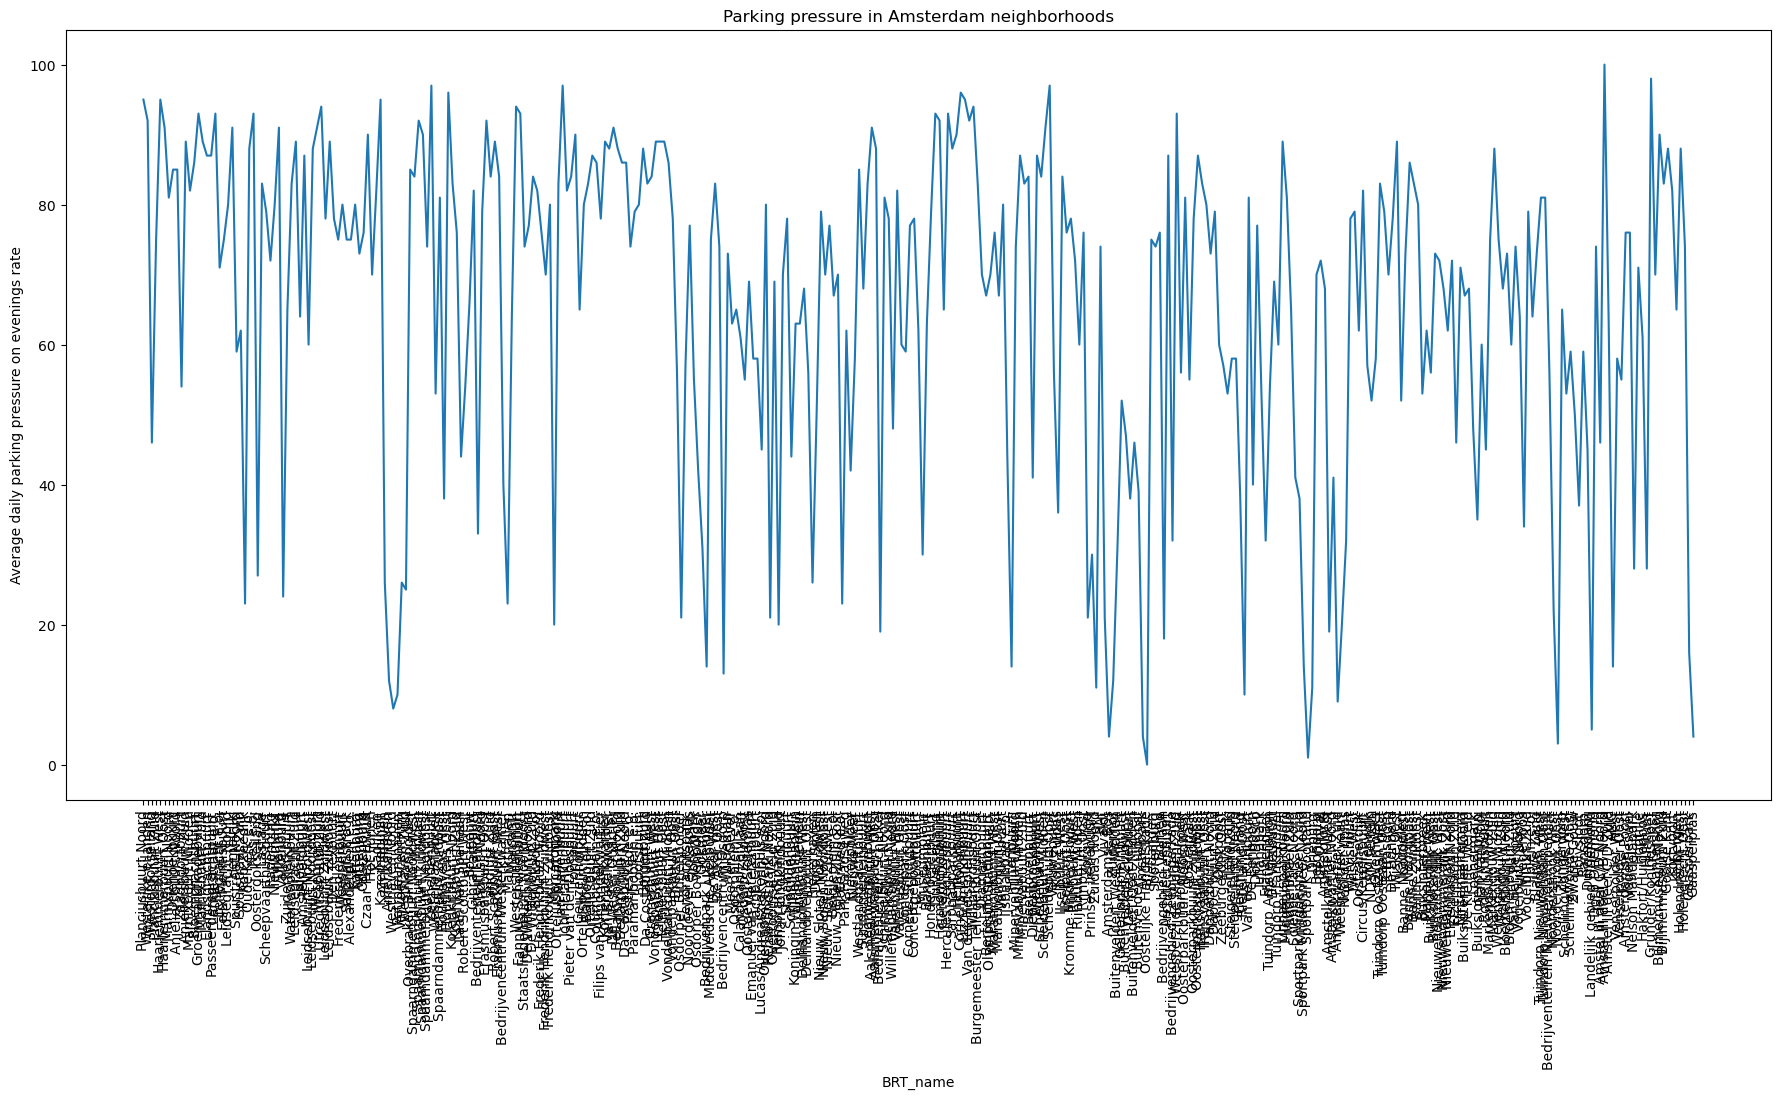

In [28]:
#graphical selection of neighborhood
plt.figure(figsize=(22,10))
plt.plot(gpdf03mp['BRT_name'], gpdf03mp['Netto_PKD'])
plt.xlabel('BRT_name')
plt.xticks(rotation=90)
plt.ylabel('Average daily parking pressure on evenings rate')
plt.title('Parking pressure in Amsterdam neighborhoods')
plt.show()

In [25]:
#file was exported to be easier to work with in excel for choosing the neighborhoods
#gpdf03mp.to_csv("slcd_mrgd_inner.csv", index=False)


In [26]:
#grouping by Wijken
#gpdf03mp_avg1 = (
#    gpdf03mp
#    .groupby("Wijken", as_index=False)
#    .agg({
#        'SDC': lambda x: x.mode().iloc[0] if not x.mode().empty else None,
#        'Periode': lambda x: x.mode().iloc[0] if not x.mode().empty else None,
#        'Cap_open': 'mean',
#        'Bez_open': 'mean',
#        'Fout': 'mean',
#        'Bez_tot': 'mean',
#        'Netto_PKD': 'mean',
#        'Bruto_PKD': 'mean',  
#        'urbtn_indx_km2': 'mean',
#        'pop_dnsty_km2': 'mean',
#        'perc_water_total': 'mean',
#        'm2_ngbhd': 'mean',
#        'perc_built_envmt': 'mean',
#        'm2_publc_space': 'mean',
#        'perc_publc_space': 'mean',
#        'm2_publc_green': 'mean',
#        'perc_public_green': 'mean',
#        'perc_publc_tree': 'mean',
#        'perc_public_greennt': 'mean',
#        'm2_publc_greennt': 'mean',
#        'perc_green': 'mean',
#        'perc_low_green': 'mean',
#        'perc_tree': 'mean',
#    })
#)
#gpdf03mp_avg1.head(10)

#there was a plan to group rows by wijken, but, considering both databases have buurt scale,
#this grouping is not needed at the moment

In [27]:
#grouping by wijken was postponed, ignore this cell at the moment
# gpdf03mp_avg1 = gpdf03mp_avg1.sort_values(by=["Netto_PKD", "perc_publc_space"], ascending=[False, True])
# gpdf03mp_avg1.head(10)

In [28]:
#grouping by wijken was postponed, ignore this cell at the moment
# gpdf03mp_avg1 = gpdf03mp_avg1.sort_values(by=["Netto_PKD", "perc_publc_space"], ascending=[True, False])
# gpdf03mp_avg1.head(10)

In [29]:
#in case we select the buurt out of only the parking pressure database
#top results
gpdf01_2.head()

,OBJECTNUMMER,Wijken,BRT_code,BRT_name,SDC,Periode,Cap_open,Bez_open,Fout,Object,Bez_tot,Netto_PKD,Bruto_PKD
0,117.0,AA,AA01,Planciusbuurt Noord,A,202403-202404,55.0,52.0,3.0,0.0,55.0,95.0,100.0
1,118.0,AA,AA02,Westelijke eilanden,A,202403-202404,313.0,287.0,9.0,0.0,296.0,92.0,95.0
2,119.0,AA,AA03,Westerdokseiland,A,202403-202404,165.0,76.0,0.0,0.0,76.0,46.0,46.0
3,120.0,AA,AA04,Planciusbuurt Zuid,A,202403-202404,20.0,15.0,1.0,0.0,16.0,75.0,80.0
4,121.0,AA,AA05,Haarlemmerbuurt West,A,202403-202404,148.0,141.0,4.0,0.0,145.0,95.0,98.0


In [30]:
#in case we select the buurt out of only the parking pressure database
#bottom results
# gpdf01_2d = gpdf01_2.sort_values(by=['Netto_PKD'], ascending=[True])
# gpdf01_2d.head()

In [ ]:
#put some graphs in here

## 4. Regression model 1 (simple)

In [23]:
#preparing the OLS with one regressor
# 1) Add constant
X = gpdf03mp.add_constant(gpdf03mp[['perc_public_green']])
y = gpdf03mp['Netto_PKD']

# 2) Fit model
model_simple = sm.OLS(y, X).fit()

# 3) Inspect results
print(model_simple.summary())

AttributeError: 'DataFrame' object has no attribute 'add_constant'

## 5. Regression model 2 (multiple)

In [26]:
#preparing the analysis with multiple variables
features = ['perc_public_green', 'urbtn_indx_km2', 'pop_dnsty_km2', 'perc_built_envmt', 'perc_publc_space', 'perc_built_area']
X_multi = sm.add_constant(gpdf03mp[features])
y = gpdf03mp['Netto_PKD']

model_multi = sm.OLS(y, X_multi).fit()
print(model_multi.summary())


MissingDataError: exog contains inf or nans

## 6. Quadratic terms

In [ ]:
#adding the quadratic term
gpdf03mp[''] = gpdf03mp['']**2
features_quad = ['', '', '', '', '', '', '']
X_quad = sm.add_constant(gpdf03mp[features_quad])
model_quad = sm.OLS(y, X_quad).fit()
print(model_quad.summary())

# Example: marginal effect of temperature at 10°C is beta_tmax + 2*beta_tmax2*10
beta_t = model_quad.params['']
beta_t2 = model_quad.params['']
me_10 = beta_t + 2*beta_t2*10
me_20 = beta_t + 2*beta_t2*20
print(f'Marginal effect of +1°C at 10°C: {me_10:.2f} Netto_PKD')
print(f'Marginal effect of +1°C at 20°C: {me_20:.2f} Netto_PKD')

In [ ]:
# Observed vs Predicted
y_pred = model_quad.fittedvalues

plt.figure()
plt.scatter(y_pred, y)
plt.xlabel('Future green area if intervined')
plt.ylabel('Current green area')
plt.title('Current vs Future (quadratic model)')
plt.show()

# Residuals vs Fitted
resid = model_quad.resid
plt.figure()
plt.scatter(y_pred, resid)
plt.axhline(0)
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted (quadratic model)')
plt.show()

print('R^2:', model_quad.rsquared)
print('Adj. R^2:', model_quad.rsquared_adj)
print('RMSE:', np.sqrt((resid**2).mean()))


## 7. Discussion of results